<a href="https://colab.research.google.com/github/Faizanealiqazi/HousePricePrediction/blob/main/House_Price_Prediction_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import os
os.chdir("/content/drive/MyDrive")

In [3]:
import pandas as pd

train_data = pd.read_csv("hpp_train.csv", index_col=False) #house price prediction data from kaggle
test_data = pd.read_csv("hpp_test.csv", index_col=False)
sample_submission = pd.read_csv("hpp_sample_submission.csv")

In [4]:
print(sample_submission)

        Id      SalePrice
0     1461  169277.052498
1     1462  187758.393989
2     1463  183583.683570
3     1464  179317.477511
4     1465  150730.079977
...    ...            ...
1454  2915  167081.220949
1455  2916  164788.778231
1456  2917  219222.423400
1457  2918  184924.279659
1458  2919  187741.866657

[1459 rows x 2 columns]


In [ ]:
print(train_data)

        Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   NaN      Reg   
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
2        3          60       RL         68.0    11250   Pave   NaN      IR1   
3        4          70       RL         60.0     9550   Pave   NaN      IR1   
4        5          60       RL         84.0    14260   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Utilities  ... PoolArea PoolQC  Fe

In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [ ]:
print("Columns with null values: ",train_data.isnull().sum())
null_columns = train_data.columns[train_data.isnull().sum() > 0]
print("Columns with null values:", null_columns)
print("No of columns with null values:", len(null_columns))

Columns with null values:  Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64
Columns with null values: Index(['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence',
       'MiscFeature'],
      dtype='object')
No of columns with null values: 19


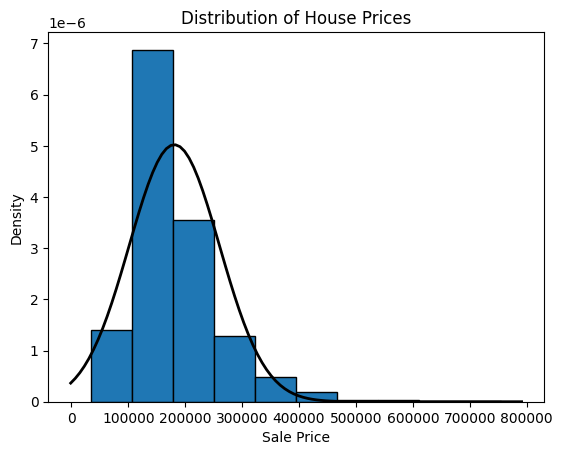

In [ ]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
num_bins=10


# Get mean and standard deviation of SalePrice
mean_price = train_data['SalePrice'].mean()
std_price = train_data['SalePrice'].std()

# Create histogram
plt.hist(train_data['SalePrice'], bins=num_bins, density=True, edgecolor='black')

# Add normal distribution curve
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mean_price, std_price)
plt.plot(x, p, 'k', linewidth=2)

# Add labels and title
plt.xlabel('Sale Price')
plt.ylabel('Density')
plt.title('Distribution of House Prices')

# Show plot
plt.show()

In [ ]:
# Select columns with categorical data
categorical_columns = train_data.select_dtypes(include=['object']).columns

# Print columns with categorical data
print("Columns with categorical data:", categorical_columns)
train_data[categorical_columns]

Columns with categorical data: Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')


,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1456,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,...,Attchd,Unf,TA,TA,Y,NaN,MnPrv,NaN,WD,Normal
1457,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,...,Attchd,RFn,TA,TA,Y,NaN,GdPrv,Shed,WD,Normal
1458,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Normal


In [ ]:
# Print unique values for each categorical column
for column in categorical_columns:
    unique_values = train_data[column].unique()
    print(f"Unique values for {column}: {unique_values}")

Unique values for MSZoning: ['RL' 'RM' 'C (all)' 'FV' 'RH']
Unique values for Street: ['Pave' 'Grvl']
Unique values for Alley: [nan 'Grvl' 'Pave']
Unique values for LotShape: ['Reg' 'IR1' 'IR2' 'IR3']
Unique values for LandContour: ['Lvl' 'Bnk' 'Low' 'HLS']
Unique values for Utilities: ['AllPub' 'NoSeWa']
Unique values for LotConfig: ['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']
Unique values for LandSlope: ['Gtl' 'Mod' 'Sev']
Unique values for Neighborhood: ['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes'
 'OldTown' 'BrkSide' 'Sawyer' 'NridgHt' 'NAmes' 'SawyerW' 'IDOTRR'
 'MeadowV' 'Edwards' 'Timber' 'Gilbert' 'StoneBr' 'ClearCr' 'NPkVill'
 'Blmngtn' 'BrDale' 'SWISU' 'Blueste']
Unique values for Condition1: ['Norm' 'Feedr' 'PosN' 'Artery' 'RRAe' 'RRNn' 'RRAn' 'PosA' 'RRNe']
Unique values for Condition2: ['Norm' 'Artery' 'RRNn' 'Feedr' 'PosN' 'PosA' 'RRAn' 'RRAe']
Unique values for BldgType: ['1Fam' '2fmCon' 'Duplex' 'TwnhsE' 'Twnhs']
Unique values for HouseStyle: ['2S

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder object
label_encoder = LabelEncoder()

# Iterate over each categorical column and replace values with numerical labels
for column in categorical_columns:
    # Fill NaN values with a placeholder
    train_data[column].fillna("NaN", inplace=True)

    # Encode the categorical values
    train_data[column] = label_encoder.fit_transform(train_data[column])

# Print the updated dataframe
print(train_data[categorical_columns])

      MSZoning  Street  Alley  LotShape  LandContour  Utilities  LotConfig  \
0            3       1      1         3            3          0          4   
1            3       1      1         3            3          0          2   
2            3       1      1         0            3          0          4   
3            3       1      1         0            3          0          0   
4            3       1      1         0            3          0          2   
...        ...     ...    ...       ...          ...        ...        ...   
1455         3       1      1         3            3          0          4   
1456         3       1      1         3            3          0          4   
1457         3       1      1         3            3          0          4   
1458         3       1      1         3            3          0          4   
1459         3       1      1         3            3          0          4   

      LandSlope  Neighborhood  Condition1  ...  GarageType  Gar

In [ ]:
# Print unique values for each column
for column in train_data.columns:
    unique_values = train_data[column].unique()
    print(f"Unique values for {column}: {unique_values}")

Unique values for Id: [   1    2    3 ... 1458 1459 1460]
Unique values for MSSubClass: [ 60  20  70  50 190  45  90 120  30  85  80 160  75 180  40]
Unique values for MSZoning: [3 4 0 1 2]
Unique values for LotFrontage: [ 65.  80.  68.  60.  84.  85.  75.  nan  51.  50.  70.  91.  72.  66.
 101.  57.  44. 110.  98.  47. 108. 112.  74. 115.  61.  48.  33.  52.
 100.  24.  89.  63.  76.  81.  95.  69.  21.  32.  78. 121. 122.  40.
 105.  73.  77.  64.  94.  34.  90.  55.  88.  82.  71. 120. 107.  92.
 134.  62.  86. 141.  97.  54.  41.  79. 174.  99.  67.  83.  43. 103.
  93.  30. 129. 140.  35.  37. 118.  87. 116. 150. 111.  49.  96.  59.
  36.  56. 102.  58.  38. 109. 130.  53. 137.  45. 106. 104.  42.  39.
 144. 114. 128. 149. 313. 168. 182. 138. 160. 152. 124. 153.  46.]
Unique values for LotArea: [ 8450  9600 11250 ... 17217 13175  9717]
Unique values for Street: [1 0]
Unique values for Alley: [1 0 2]
Unique values for LotShape: [3 0 1 2]
Unique values for LandContour: [3 0 2 1]
Un

In [ ]:
null_columns = train_data.columns[train_data.isnull().sum() > 0]
print("Columns with null values:", null_columns)
print("No of columns with null values:", len(null_columns))
print(train_data[null_columns])

# Print unique values for each column
for column in train_data[null_columns]:
    unique_values = train_data[column].unique()
    print(f"Unique values for {column}: {unique_values}")

Columns with null values: Index(['LotFrontage', 'MasVnrArea', 'GarageYrBlt'], dtype='object')
No of columns with null values: 3
      LotFrontage  MasVnrArea  GarageYrBlt
0            65.0       196.0       2003.0
1            80.0         0.0       1976.0
2            68.0       162.0       2001.0
3            60.0         0.0       1998.0
4            84.0       350.0       2000.0
...           ...         ...          ...
1455         62.0         0.0       1999.0
1456         85.0       119.0       1978.0
1457         66.0         0.0       1941.0
1458         68.0         0.0       1950.0
1459         75.0         0.0       1965.0

[1460 rows x 3 columns]
Unique values for LotFrontage: [ 65.  80.  68.  60.  84.  85.  75.  nan  51.  50.  70.  91.  72.  66.
 101.  57.  44. 110.  98.  47. 108. 112.  74. 115.  61.  48.  33.  52.
 100.  24.  89.  63.  76.  81.  95.  69.  21.  32.  78. 121. 122.  40.
 105.  73.  77.  64.  94.  34.  90.  55.  88.  82.  71. 120. 107.  92.
 134.  62.  86. 

In [ ]:
# Count the number of records where all specified columns are null
num_null_records = train_data[null_columns].isnull().any(axis=1).sum()

for column in null_columns:
    num_null_in_column = train_data[column].isnull().sum()
    print(f"Number of null values in {column}: {num_null_in_column}")

print("Number of records where any of specified column has null value :", num_null_records)

Number of null values in LotFrontage: 259
Number of null values in MasVnrArea: 8
Number of null values in GarageYrBlt: 81
Number of records where any of specified column has null value : 339


In [ ]:
#Handling missing values in LotFrontage
train_data.LotFrontage.fillna(train_data.LotFrontage.median(), inplace=True)
train_data["LotFrontage"] = train_data["LotFrontage"].fillna(train_data.groupby(["Neighborhood","LotShape"])["LotFrontage"].transform("median"))

In [ ]:
print("Null data in LotFrontage: ",train_data["LotFrontage"].isnull().sum())

Null data in LotFrontage:  0


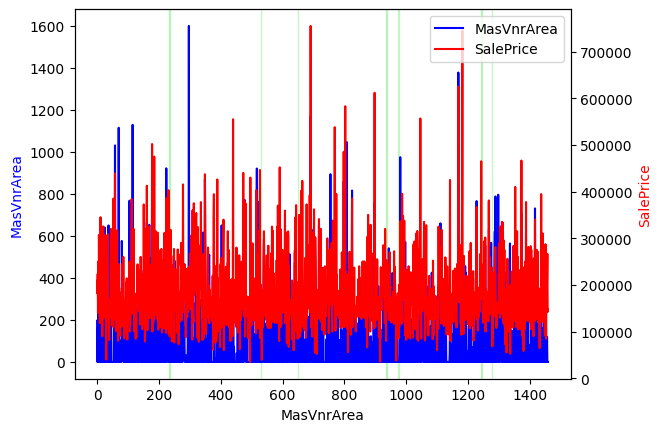

In [ ]:
#Handling missing values in MasVnrArea
fig, ax = plt.subplots()

# Plot 'MasVnrArea' on the first y-axis
ax.plot(train_data['MasVnrArea'], label='MasVnrArea', color='blue')
ax.set_xlabel('MasVnrArea')
ax.set_ylabel('MasVnrArea', color='blue')

# Create a second y-axis and plot 'SalePrice' on it
ax2 = ax.twinx()
ax2.plot(train_data['SalePrice'], label='SalePrice', color='red')
ax2.set_ylabel('SalePrice', color='red')

# Add legend
lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper right')

# Highlight each null value with a green background
null_indices = train_data['MasVnrArea'].isnull()
for i, is_null in enumerate(null_indices):
    if is_null:
        ax.axvspan(i, i + 1, color='lightgreen', alpha=0.5)

plt.show()

In [ ]:
#Filling null values in MasVnrArea with zero
train_data.MasVnrArea.fillna(0, inplace=True)

In [ ]:
print("Null data in LotFrontage: ",train_data["MasVnrArea"].isnull().sum())

Null data in LotFrontage:  0


In [ ]:
garage_columns = ['GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond']

# Printing values where GarageYrBlt has missing values
print(train_data[train_data['GarageYrBlt'].isnull()][garage_columns].head(50))

     GarageType  GarageYrBlt  GarageFinish  GarageCars  GarageArea  \
39            6          NaN             1           0           0   
48            6          NaN             1           0           0   
78            6          NaN             1           0           0   
88            6          NaN             1           0           0   
89            6          NaN             1           0           0   
99            6          NaN             1           0           0   
108           6          NaN             1           0           0   
125           6          NaN             1           0           0   
127           6          NaN             1           0           0   
140           6          NaN             1           0           0   
148           6          NaN             1           0           0   
155           6          NaN             1           0           0   
163           6          NaN             1           0           0   
165           6     

In [ ]:
# Select the first 50 rows where 'GarageYrBlt' is null and print the specified garage columns
null_GarageYrBlt_data = train_data[train_data['GarageYrBlt'].isnull()][garage_columns].head(50)
#print(null_GarageYrBlt_data)

# Check if for every NaN value of 'GarageYrBlt', 'GarageType' has a value of 6
all_GarageType_6 = null_GarageYrBlt_data['GarageType'].all() == 6
print("For every NaN value of 'GarageYrBlt', 'GarageType' has a value of 6:", all_GarageType_6)

For every NaN value of 'GarageYrBlt', 'GarageType' has a value of 6: False


In [ ]:
# Drop the 'GarageYrBlt' column
train_data.drop(columns='GarageYrBlt', inplace=True)

In [ ]:
print(train_data.shape)

(1460, 80)


In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Extract the 'SalePrice' column
sale_price = train_data['SalePrice']

# Remove the 'SalePrice' column from the dataset
data_without_sale_price = train_data.drop(columns=['SalePrice'])

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_without_sale_price)

# Initialize PCA
pca = PCA()

# Fit PCA to the standardized data
pca.fit(scaled_data)

# Transform the data to the new PCA space
pca_data = pca.transform(scaled_data)

# Print the explained variance ratio
print("Explained variance ratio:", pca.explained_variance_ratio_)


Explained variance ratio: [1.27790087e-01 5.14838466e-02 4.65247160e-02 3.86680013e-02
 3.12771141e-02 2.75886808e-02 2.47783690e-02 2.27991793e-02
 2.14199116e-02 2.01233611e-02 1.97184143e-02 1.85413492e-02
 1.82228147e-02 1.71654919e-02 1.69778847e-02 1.65626396e-02
 1.55098707e-02 1.52724793e-02 1.50933853e-02 1.46402477e-02
 1.45091182e-02 1.40017362e-02 1.38569850e-02 1.33393528e-02
 1.29186314e-02 1.27742694e-02 1.24479830e-02 1.23818459e-02
 1.19345738e-02 1.16454166e-02 1.15639676e-02 1.11345443e-02
 1.10073602e-02 1.06259817e-02 1.03135748e-02 1.01647198e-02
 1.00286432e-02 9.82032797e-03 9.52725153e-03 9.35084968e-03
 9.24909665e-03 8.90612752e-03 8.40182951e-03 8.17529487e-03
 8.14391157e-03 7.82208075e-03 7.63019596e-03 7.58971213e-03
 7.33558713e-03 6.99788161e-03 6.86742805e-03 6.65410066e-03
 6.54793377e-03 6.31528681e-03 5.98777624e-03 5.58483138e-03
 5.45189784e-03 5.30661267e-03 5.03532958e-03 4.83163345e-03
 4.76763726e-03 4.74774114e-03 4.11405526e-03 4.06682701e-0

In [ ]:
threshold = 0.01

# Find the indices of columns with explained variance ratio less than the threshold
irrelevant_columns_indices = np.where(pca.explained_variance_ratio_ < threshold)[0]

# Get the names of the irrelevant columns
irrelevant_columns = train_data.columns[irrelevant_columns_indices]

# Drop the irrelevant columns from the dataset
train_data_filtered = train_data.drop(columns=irrelevant_columns)

# Print the updated DataFrame
print(train_data_filtered.head())

   Id  MSSubClass  MSZoning  LotFrontage  LotArea  Street  Alley  LotShape  \
0   1          60         3         65.0     8450       1      1         3   
1   2          20         3         80.0     9600       1      1         3   
2   3          60         3         68.0    11250       1      1         0   
3   4          70         3         60.0     9550       1      1         0   
4   5          60         3         84.0    14260       1      1         0   

   LandContour  Utilities  ...  ExterCond  Foundation  BsmtQual  BsmtCond  \
0            3          0  ...          4           2         2         4   
1            3          0  ...          4           1         2         4   
2            3          0  ...          4           2         2         4   
3            3          0  ...          4           0         4         1   
4            3          0  ...          4           2         2         4   

   BsmtExposure  BsmtFinType1  BsmtFinSF1  BsmtFinType2  BsmtFinSF2 

In [ ]:
train_data_filtered.shape

(1460, 38)

In [ ]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np

# Assuming train_data_filtered is your feature matrix and target variable
X = train_data_filtered.drop(columns=['SalePrice'])
y = train_data_filtered['SalePrice']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Defining models
models = {
    "GradientBoosting": GradientBoostingRegressor(),
    "RandomForest": RandomForestRegressor(),
    "SVM": SVR(),
    "LinearRegression": LinearRegression()
}

# Defining parameter grids for GridSearchCV with 4-fold cross-validation
param_grids = {
    "LinearRegression": {
        "fit_intercept": [True, False],
        "positive": [True, False]
    },
    "GradientBoosting": {
        "n_estimators": [100, 200, 300],
        "learning_rate": [0.05, 0.1, 0.2],
        "max_depth": [3, 4, 5]
    },
    "RandomForest": {
        "n_estimators": [100, 200, 300],
        "max_depth": [3, 4, 5]
    },
    "SVM": {
        "kernel": ['linear', 'rbf'],
        "C": [0.1, 1, 10],
        "gamma": ['scale', 'auto']
    }
}

In [ ]:
# Performing GridSearchCV for each model with 4-fold cross-validation
best_estimators = {}
for model_name, model in models.items():
    print(f"Grid search for {model_name}...")
    grid_search = GridSearchCV(model, param_grid=param_grids[model_name], cv=4, scoring='neg_mean_squared_error')
    grid_search.fit(X_train, y_train)
    best_estimators[model_name] = grid_search.best_estimator_
    print(f"Best parameters: {grid_search.best_params_}")
    print(f"Best CV score: {grid_search.best_score_}")

Grid search for GradientBoosting...
Best parameters: {'learning_rate': 0.05, 'max_depth': 4, 'n_estimators': 100}
Best CV score: -1558441524.7951632
Grid search for RandomForest...
Best parameters: {'max_depth': 5, 'n_estimators': 100}
Best CV score: -1640490371.801753
Grid search for SVM...
Best parameters: {'C': 10, 'gamma': 'scale', 'kernel': 'linear'}
Best CV score: -2870876046.655823
Grid search for LinearRegression...
Best parameters: {'fit_intercept': True, 'positive': False}
Best CV score: -1708222199.0183506


In [ ]:
# Evaluating the best models on the test set
print("\nEvaluating best models on test set:")
for model_name, model in best_estimators.items():
    y_pred = model.predict(X_test)
    print(f"{model_name} - Predictions: {y_pred}")


Evaluating best models on test set:
GradientBoosting - Predictions: [157172.32234669 344260.06653489  97921.49005329 124057.05555046
 350600.04109182  97159.48609072 252276.85915048 132258.08435396
  97159.48609072 143441.25695464 156759.40452102 134586.29031791
 119038.21334614 203297.66495409 172461.0497445  136804.42532152
 194275.4344267  134008.76201389 110545.57605724 227892.77247255
 139477.68941031 254156.73692597 187015.16441816 129146.10919253
 198136.63088096 172001.87077345 201759.74365068 129849.24731315
 177209.78068328 180687.27669634 142086.58011643 254792.13285176
 162989.6076345  108626.45006177 254861.53363638 152236.06290526
 117756.36380366 196722.46852474 300272.17881193 137056.12254131
 122268.64590174 214123.68417944 132818.39873156 380758.74906654
 135291.9728117  129413.68290021 132113.59303853 129712.11786021
 405038.76800181 135663.65535185 122492.70465311 167864.16582271
 121252.68180906 292915.05885556 151603.69869296 239067.744646
 210470.75336174 158243

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Dictionary to store evaluation metrics for each model
evaluation_metrics = {}

# Calculate evaluation metrics for each model
for model_name, model in best_estimators.items():
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    evaluation_metrics[model_name] = {"MAE": mae, "MSE": mse, "RMSE": rmse}

# Print evaluation metrics for each model
print("\nEvaluation metrics for each model:")
for model_name, metrics in evaluation_metrics.items():
    print(f"{model_name}:")
    for metric_name, value in metrics.items():
        print(f"{metric_name}: {value}")
    print()



Evaluation metrics for each model:
GradientBoosting:
MAE: 21564.540193156103
MSE: 1103494273.1927211
RMSE: 33218.88428579023

RandomForest:
MAE: 24394.849440838945
MSE: 1425341468.6287663
RMSE: 37753.69476791333

SVM:
MAE: 31200.735731540106
MSE: 2573166153.4678345
RMSE: 50726.38518037565

LinearRegression:
MAE: 27239.20175525007
MSE: 1623216371.0092695
RMSE: 40289.15947260838



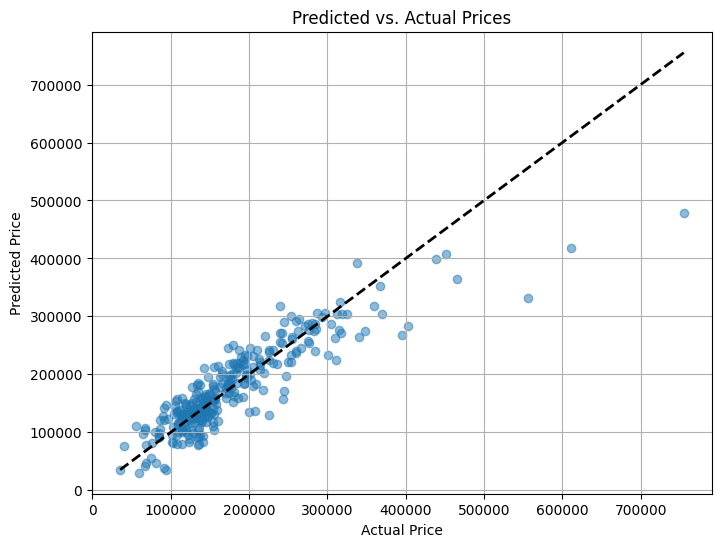

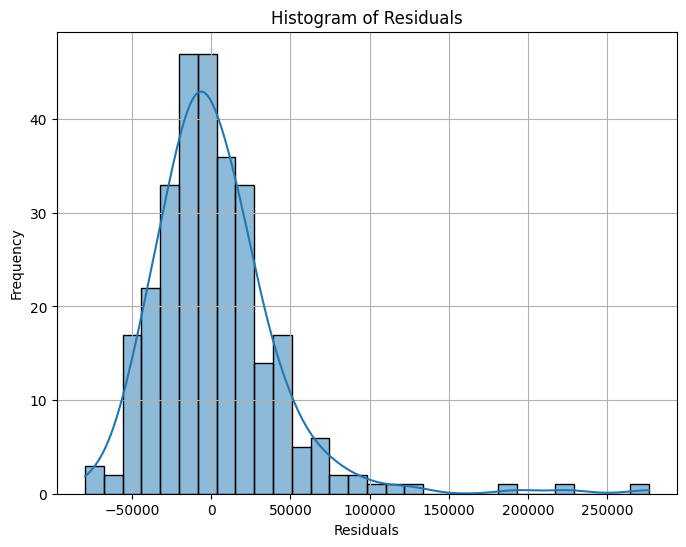

MAE: 27239.20175525007
MSE: 1623216371.0092695
RMSE: 40289.15947260838
R-squared: 0.7883771397508088


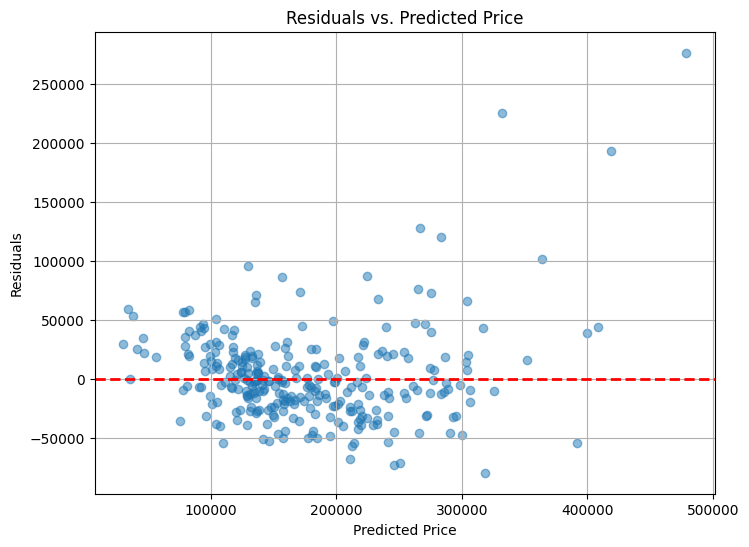

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# 1. Visual Inspection
def plot_predicted_vs_actual(y_test, y_pred, title):
    plt.figure(figsize=(8, 6))
    plt.scatter(y_test, y_pred, alpha=0.5)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
    plt.xlabel('Actual Price')
    plt.ylabel('Predicted Price')
    plt.title(title)
    plt.grid(True)
    plt.show()

# 2. Error Distribution
def plot_residual_histogram(y_test, y_pred):
    residuals = y_test - y_pred
    plt.figure(figsize=(8, 6))
    sns.histplot(residuals, bins=30, kde=True)
    plt.xlabel('Residuals')
    plt.ylabel('Frequency')
    plt.title('Histogram of Residuals')
    plt.grid(True)
    plt.show()

# 3. Metrics
def calculate_metrics(y_test, y_pred):
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    r2 = r2_score(y_test, y_pred)
    return mae, mse, rmse, r2

# 4. Residual Analysis
def plot_residuals_vs_predicted(y_test, y_pred):
    residuals = y_test - y_pred
    plt.figure(figsize=(8, 6))
    plt.scatter(y_pred, residuals, alpha=0.5)
    plt.axhline(y=0, color='r', linestyle='--', linewidth=2)
    plt.xlabel('Predicted Price')
    plt.ylabel('Residuals')
    plt.title('Residuals vs. Predicted Price')
    plt.grid(True)
    plt.show()


# Assuming y_test and y_pred are the true and predicted prices, respectively.

# 1. Visual Inspection
plot_predicted_vs_actual(y_test, y_pred, title='Predicted vs. Actual Prices')

# 2. Error Distribution
plot_residual_histogram(y_test, y_pred)

# 3. Metrics
mae, mse, rmse, r2 = calculate_metrics(y_test, y_pred)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R-squared:", r2)

# 4. Residual Analysis
plot_residuals_vs_predicted(y_test, y_pred)


In [ ]:
from sklearn.cluster import KMeans

n_clusters = 2

# Initialize KMeans clustering algorithm
kmeans = KMeans(n_clusters=n_clusters)

# Fit KMeans to the PCA-transformed data
cluster_labels = kmeans.fit_predict(pca_data)

# Print cluster labels
print("Cluster Labels:", cluster_labels)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster Labels: [0 1 0 ... 0 1 1]


In [ ]:
# Calculate the minimum and maximum values of the 'SalePrice' column
min_price = train_data['SalePrice'].min()
max_price = train_data['SalePrice'].max()

# Determine the bin edges to divide the range into n_clusters equal-width bins
bin_edges = np.linspace(min_price, max_price, n_clusters+1)

# Assign each data point to the appropriate bin based on its 'SalePrice' value
train_data['true_labels'] = pd.cut(train_data['SalePrice'], bins=bin_edges, labels=[0, 1], include_lowest=True)
true_labels = train_data['true_labels']
print(true_labels)

0       0
1       0
2       0
3       0
4       0
       ..
1455    0
1456    0
1457    0
1458    0
1459    0
Name: true_labels, Length: 1460, dtype: category
Categories (2, int64): [0 < 1]


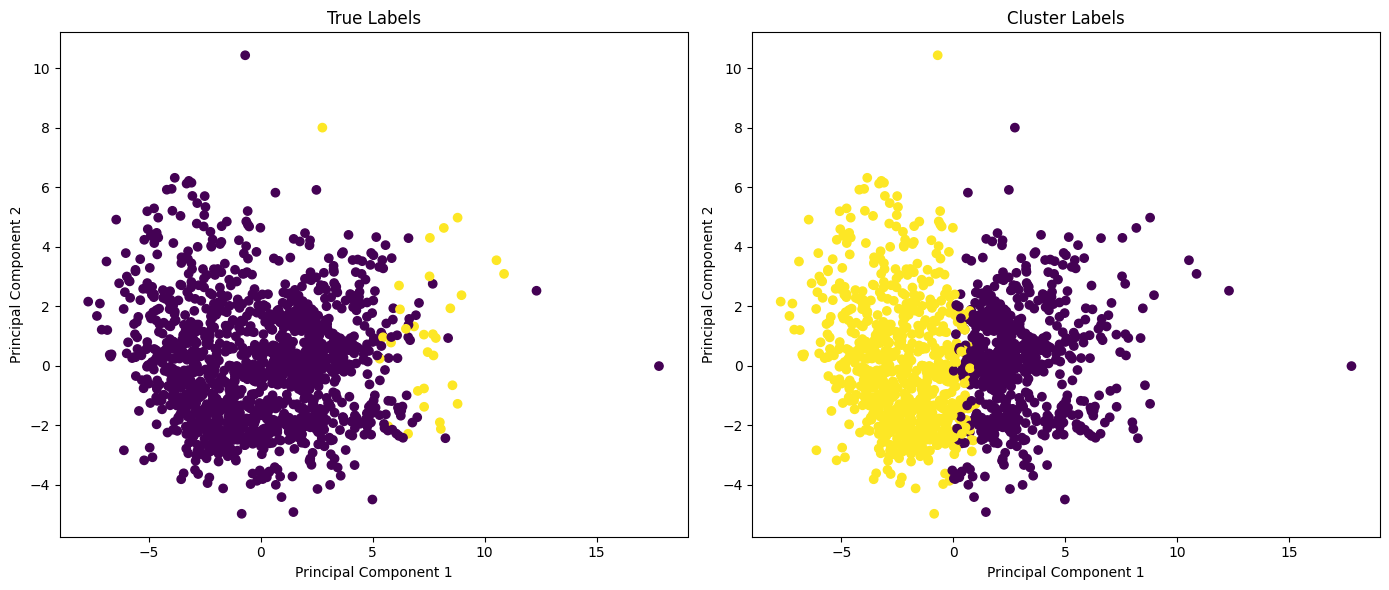

In [ ]:
import matplotlib.pyplot as plt

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot true_labels
axes[0].scatter(pca_data[:, 0], pca_data[:, 1], c=true_labels, cmap='viridis')
axes[0].set_title('True Labels')
axes[0].set_xlabel('Principal Component 1')
axes[0].set_ylabel('Principal Component 2')

# Plot cluster_labels
axes[1].scatter(pca_data[:, 0], pca_data[:, 1], c=cluster_labels, cmap='viridis')
axes[1].set_title('Cluster Labels')
axes[1].set_xlabel('Principal Component 1')
axes[1].set_ylabel('Principal Component 2')

plt.tight_layout()
plt.show()

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.metrics import pairwise_distances
from sklearn.metrics import pairwise_distances

def calculate_entropy(cluster_labels):
    unique_labels, label_counts = np.unique(cluster_labels, return_counts=True)
    total_points = len(cluster_labels)
    entropy = 0
    for count in label_counts:
        proportion = count / total_points
        entropy -= proportion * np.log2(proportion)
    return entropy

def calculate_purity(cluster_labels, true_labels):
    # Construct the confusion matrix
    cm = confusion_matrix(true_labels, cluster_labels)
    # Sum up the maximum values in each cluster
    purity = np.sum(np.amax(cm, axis=0)) / np.sum(cm)
    return purity


def calculate_cluster_cohesion(data, cluster_labels):
    num_clusters = len(np.unique(cluster_labels))
    cohesion_scores = []

    for cluster in range(num_clusters):
        cluster_data = data[cluster_labels == cluster]
        if len(cluster_data) > 1:
            # Calculate pairwise distances within the cluster
            distances = pairwise_distances(cluster_data)
            # Compute average pairwise distance
            avg_distance = np.mean(distances)
            cohesion_scores.append(avg_distance)
        else:
            # If only one point in the cluster, cohesion is zero
            cohesion_scores.append(0)

    return cohesion_scores

def calculate_cluster_separation(data, cluster_labels):
    num_clusters = len(np.unique(cluster_labels))
    separation_scores = []

    # Calculate centroids of each cluster
    centroids = []
    for cluster in range(num_clusters):
        cluster_data = data[cluster_labels == cluster]
        centroids.append(np.mean(cluster_data, axis=0))

    # Compute pairwise distances between centroids
    centroid_distances = pairwise_distances(centroids)

    # Compute average pairwise distance between centroids
    avg_distance = np.mean(centroid_distances)

    return avg_distance

In [ ]:
# Calculate entropy of the clusters
entropy = calculate_entropy(cluster_labels)
print("Entropy of the clusters:", entropy)

# Calculate purity of the clusters
purity = calculate_purity(cluster_labels, true_labels)
print("Purity of the clusters:", purity)

# Calculate cohesion of clusters
cohesion_scores = calculate_cluster_cohesion(pca_data, cluster_labels)
print("Cluster Cohesion Scores:", cohesion_scores)

# Example cluster separation calculation
separation_score = calculate_cluster_separation(pca_data, cluster_labels)
print("Average Pairwise Distance between Centroids:", separation_score)

Entropy of the clusters: 0.9899652917437126
Purity of the clusters: 0.9794520547945206
Cluster Cohesion Scores: [10.78852228554838, 11.941136470805684]
Average Pairwise Distance between Centroids: 2.6888064489441033


In [ ]:
from sklearn.cluster import AgglomerativeClustering

# Cluster the data using Agglomerative Hierarchical Clustering
agglomerative_clusterer = AgglomerativeClustering(n_clusters=n_clusters)
agglomerative_cluster_labels = agglomerative_clusterer.fit_predict(pca_data)

# Calculate entropy of the clusters
agglomerative_entropy = calculate_entropy(agglomerative_cluster_labels)
print("Agglomerative Hierarchical Clustering - Entropy of the clusters:", agglomerative_entropy)

# Calculate purity of the clusters
agglomerative_purity = calculate_purity(agglomerative_cluster_labels, true_labels)
print("Agglomerative Hierarchical Clustering - Purity of the clusters:", agglomerative_purity)

# Calculate cluster cohesion
agglomerative_cohesion_scores = calculate_cluster_cohesion(pca_data, agglomerative_cluster_labels)
print("Agglomerative Hierarchical Clustering - Cluster Cohesion Scores:", agglomerative_cohesion_scores)

# Calculate cluster separation
agglomerative_separation_score = calculate_cluster_separation(pca_data, agglomerative_cluster_labels)
print("Agglomerative Hierarchical Clustering - Average Pairwise Distance between Centroids:", agglomerative_separation_score)

Agglomerative Hierarchical Clustering - Entropy of the clusters: 0.984153194547317
Agglomerative Hierarchical Clustering - Purity of the clusters: 0.9794520547945206
Agglomerative Hierarchical Clustering - Cluster Cohesion Scores: [10.504341675976132, 12.341888665735967]
Agglomerative Hierarchical Clustering - Average Pairwise Distance between Centroids: 2.355257881663919


In [ ]:
from sklearn.mixture import GaussianMixture

# Cluster the data using Gaussian Mixture Models
gmm_clusterer = GaussianMixture(n_components=n_clusters, random_state=42)
gmm_cluster_labels = gmm_clusterer.fit_predict(pca_data)

# Calculate entropy of the clusters
gmm_entropy = calculate_entropy(gmm_cluster_labels)
print("Gaussian Mixture Models Clustering - Entropy of the clusters:", gmm_entropy)

# Calculate purity of the clusters
gmm_purity = calculate_purity(gmm_cluster_labels, true_labels)
print("Gaussian Mixture Models Clustering - Purity of the clusters:", gmm_purity)

# Calculate cluster cohesion
gmm_cohesion_scores = calculate_cluster_cohesion(pca_data, gmm_cluster_labels)
print("Gaussian Mixture Models Clustering - Cluster Cohesion Scores:", gmm_cohesion_scores)

# Calculate cluster separation
gmm_separation_score = calculate_cluster_separation(pca_data, gmm_cluster_labels)
print("Gaussian Mixture Models Clustering - Average Pairwise Distance between Centroids:", gmm_separation_score)

Gaussian Mixture Models Clustering - Entropy of the clusters: 0.8302402204924686
Gaussian Mixture Models Clustering - Purity of the clusters: 0.9794520547945206
Gaussian Mixture Models Clustering - Cluster Cohesion Scores: [10.755473503287822, 14.362041268963463]
Gaussian Mixture Models Clustering - Average Pairwise Distance between Centroids: 2.2421199486160037


#Interpretation:
All three clustering algorithms achieved high purity values which indicates that majority of data points are within each cluster share same true label. The entropy is low which shows that clusters are pure and well separated
The difference in cohesion values for all three algorithms is small which indicates that clusters are internally coherent and tightly packed with in clusters.